In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, plot_confusion_matrix

from imblearn.over_sampling import SMOTE

In [14]:
nba = pd.read_csv('nba_players.csv')

In [15]:
nba

,Unnamed: 0,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
0,0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,...,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20,0
11141,11141,11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,...,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20,0
11142,11142,11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,...,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20,0
11143,11143,11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,...,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20,0


In [16]:
nba.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season',
       'potential_player'],
      dtype='object')

##  EDA, Cleaning and Preprocessing

In [22]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11145 non-null  int64  
 1   Unnamed: 0.1       11145 non-null  int64  
 2   player_name        11145 non-null  object 
 3   team_abbreviation  11145 non-null  object 
 4   age                11145 non-null  float64
 5   player_height      11145 non-null  float64
 6   player_weight      11145 non-null  float64
 7   college            11145 non-null  object 
 8   country            11145 non-null  object 
 9   draft_year         11145 non-null  object 
 10  draft_round        11145 non-null  object 
 11  draft_number       11145 non-null  object 
 12  gp                 11145 non-null  int64  
 13  pts                11145 non-null  float64
 14  reb                11145 non-null  float64
 15  ast                11145 non-null  float64
 16  net_rating         111

In [23]:
nba.describe()

,Unnamed: 0,Unnamed: 0.1,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,5572.000000,5572.000000,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078,0.040825
std,3217.428709,3217.428709,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017,0.197895
min,0.000000,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2786.000000,2786.000000,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000,0.000000
50%,5572.000000,5572.000000,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000,0.000000
75%,8358.000000,8358.000000,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000,0.000000
max,11144.000000,11144.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000,1.000000


In [25]:
list_item = []
for col in nba.columns:
    list_item.append([col, nba[col].dtype, nba[col].isna().sum(), round((nba[col].isna().sum()/len(nba[col]))*100,2),
                      nba[col].nunique(), list(nba[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['feature', 'type_data', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)
dfDesc

,feature,type_data,null,nulPct,unique,uniqueSample
0,Unnamed: 0,int64,0,0.0,11145,"[1586, 6487, 504, 6561, 857]"
1,Unnamed: 0.1,int64,0,0.0,11145,"[10492, 7439, 5603, 10349, 5966]"
2,player_name,object,0,0.0,2235,"[Joe Kleine, Peja Stojakovic, J.J. Barea, Scot..."
3,team_abbreviation,object,0,0.0,36,"[POR, DEN, ATL, ORL, CHI]"
4,age,float64,0,0.0,27,"[32.0, 25.0, 23.0, 30.0]"
5,player_height,float64,0,0.0,30,"[200.66, 203.2, 208.28, 193.04]"
6,player_weight,float64,0,0.0,157,"[127.00576000000001, 102.0582, 97.522280000000..."
7,college,object,0,0.0,316,"[None, Auburn-Montgomery, Utah, California-Ber..."
8,country,object,0,0.0,76,"[USA, Australia]"
9,draft_year,object,0,0.0,45,"[1991, 2007, Undrafted, 1988, 2003]"


### Cleaning and Preprocessing

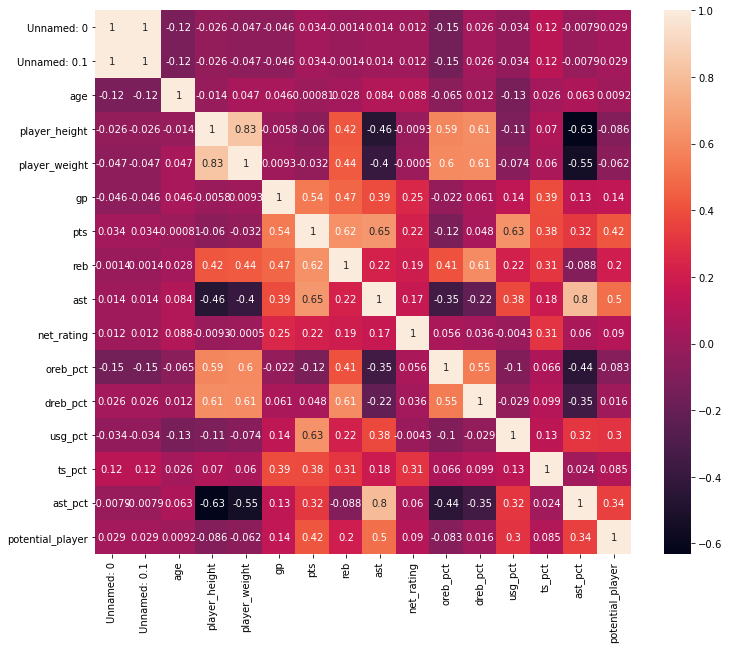

In [142]:
plt.figure(figsize=(12,10))
sns.heatmap(nba.corr(),annot=True)

In [47]:
nba['college'].value_counts()

None                              1684
Kentucky                           360
Duke                               331
North Carolina                     318
UCLA                               280
                                  ... 
Northern Arizona                     1
Miami (Fla.)                         1
University of Colorado Boulder       1
North Dakota                         1
Liberty                              1
Name: college, Length: 316, dtype: int64

In [46]:
nba['country'].value_counts()

USA                    9410
France                  153
Canada                  140
Spain                    79
Brazil                   78
                       ... 
Angola                    1
Guinea                    1
Ghana                     1
Trinidad and Tobago       1
Sudan (UK)                1
Name: country, Length: 76, dtype: int64

In [45]:
nba['draft_year'].value_counts().head(5)

Undrafted    1942
1998          454
2003          430
2005          420
1996          406
Name: draft_year, dtype: int64

In [44]:
nba['draft_round'].value_counts()

1            6513
2            2629
Undrafted    1959
3              20
4              12
6               5
7               5
8               2
Name: draft_round, dtype: int64

In [43]:
nba['draft_number'].value_counts()

Undrafted    1959
1             320
5             320
4             311
2             299
             ... 
87              1
82              1
69              1
127             1
120             1
Name: draft_number, Length: 75, dtype: int64

In [42]:
nba['player_name'].value_counts()

Vince Carter           22
Dirk Nowitzki          21
Kevin Garnett          20
Kobe Bryant            20
Jason Terry            19
                       ..
Norvel Pelle            1
Kris Joseph             1
Rafael Addison          1
Nigel Williams-Goss     1
DeMarco Johnson         1
Name: player_name, Length: 2235, dtype: int64

In [52]:
nba['season'].value_counts()

2017-18    540
2018-19    530
2019-20    514
2014-15    492
2016-17    486
2013-14    482
2011-12    478
2015-16    476
2012-13    469
2004-05    464
2005-06    458
2006-07    458
2010-11    452
2007-08    451
2008-09    445
2003-04    442
2009-10    442
2000-01    441
1996-97    441
2001-02    440
1997-98    439
1998-99    439
1999-00    438
2002-03    428
Name: season, dtype: int64

In [49]:
nba[nba['player_name'] == 'Vince Carter'].head(5)

,Unnamed: 0,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
1005,1005,1005,Vince Carter,TOR,22.0,200.66,97.52228,North Carolina,USA,1998,...,5.7,3.0,1.2,0.061,0.127,0.257,0.516,0.164,1998-99,0
1604,1604,1604,Vince Carter,TOR,23.0,200.66,97.52228,North Carolina,USA,1998,...,5.8,3.9,3.6,0.052,0.120,0.299,0.543,0.195,1999-00,0
2125,2125,2125,Vince Carter,TOR,24.0,198.12,102.05820,North Carolina,USA,1998,...,5.5,3.9,5.1,0.065,0.093,0.305,0.551,0.187,2000-01,0
2353,2353,2353,Vince Carter,TOR,25.0,198.12,102.05820,North Carolina,USA,1998,...,5.2,4.0,1.5,0.063,0.085,0.302,0.515,0.190,2001-02,0
2911,2911,2911,Vince Carter,TOR,26.0,198.12,102.05820,North Carolina,USA,1998,...,4.4,3.3,-1.2,0.045,0.101,0.279,0.532,0.181,2002-03,0


Mengapa nama pemain yang lebih dari 1 tidak di delete, karena itu merupakan data yang benar. karena hampir setiap pemain pasti melakukan perubahan dalam per season yaitu dari skor pts, dan ada kemungkinan mereka pindah tim contohnya seperti diatas

In [59]:
nba_clean = nba.drop(['Unnamed: 0', 'Unnamed: 0.1','player_name', 'team_abbreviation', 'college','country','draft_year','draft_round','draft_number','season','potential_player'],axis=1)

In [60]:
nba_clean

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113
1,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048
2,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148
3,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077
4,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,28.0,208.28,108.862080,63,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064
11141,23.0,195.58,97.522280,15,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033
11142,28.0,213.36,117.933920,49,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076
11143,27.0,208.28,104.779752,20,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056


In [63]:
scaler = StandardScaler()

scaler.fit(nba_clean)
scaler_feature = scaler.transform(nba_clean)

In [64]:
nba_scaled = pd.DataFrame(scaler_feature, columns=nba_clean.columns)
nba_scaled

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,2.033006,-0.292998,-0.067402,0.119440,-0.408829,5.025470,0.725497,1.502370,2.971452,2.867924,-1.613728,-0.294306,-0.190264
1,0.191372,1.641595,1.375352,-1.476196,-0.981681,-0.825572,-0.838872,1.189615,0.510564,0.146034,-0.199814,-0.789883,-0.874381
2,2.723619,0.536113,-0.428090,-1.715542,-1.234410,-1.025951,-0.783001,0.004436,1.125786,-0.629388,-1.557171,-1.336030,0.178107
3,-0.729445,0.259743,0.004736,0.478458,-0.745801,-0.504967,-0.671261,-0.538771,0.100416,0.114384,-0.350632,-1.103412,-0.569160
4,1.572598,0.536113,0.653975,-0.997505,-0.964832,-0.464892,-0.894742,-0.744531,1.216930,0.589132,-1.104719,1.040719,-0.958580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,0.191372,0.812484,0.653975,0.438567,0.164023,0.737377,-0.391909,0.555873,0.009272,-0.028040,-0.935049,0.980036,-0.705983
11141,-0.959649,-0.569369,-0.247746,-1.476196,-1.167015,-1.306480,-0.950612,-0.020255,-0.856596,-1.325686,-0.407188,-0.284192,-1.032255
11142,0.191372,1.365225,1.375352,-0.119905,-0.341434,0.617150,-0.391909,0.638177,-0.605950,1.190480,-1.236684,1.334020,-0.579685
11143,-0.038832,0.812484,0.329355,-1.276742,-1.015378,-0.224438,-0.783001,-1.172512,0.670066,1.506979,-1.123571,0.130475,-0.790182


In [66]:
poten = nba['potential_player']

In [69]:
poten.value_counts()

0    10690
1      455
Name: potential_player, dtype: int64

## Visualisasi

In [113]:
skor = nba.sort_values('pts',ascending=False).head(1).iloc[0,13]
player = nba.sort_values('pts',ascending=False).head(1).iloc[0,2]
print(f'Pemain yang pernah mencetak score tertinggi adalah {player}, dengan skor {skor} pts')

Pemain yang pernah mencetak score tertinggi adalah James Harden, dengan skor 36.1 pts


In [114]:
assist = nba.sort_values('ast',ascending=False).head(1).iloc[0,15]
player = nba.sort_values('ast',ascending=False).head(1).iloc[0,2]
print(f'Pemain yang pernah memberi assist tertinggi adalah {player}, dengan skor {assist} pts')

Pemain yang pernah memberi assist tertinggi adalah Rajon Rondo, dengan skor 11.7 pts


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

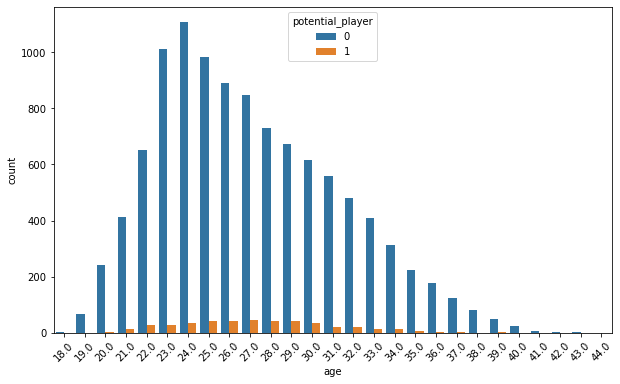

In [95]:
plt.figure(figsize=(10,6))
sns.countplot(x='age', hue='potential_player', data=nba)
plt.xticks(rotation=45)

In [305]:
nba['age'].value_counts(ascending=False)

24.0    1143
23.0    1039
25.0    1025
26.0     933
27.0     891
28.0     774
29.0     718
22.0     678
30.0     654
31.0     581
32.0     502
21.0     425
33.0     424
34.0     329
20.0     246
35.0     232
36.0     180
37.0     126
38.0      83
19.0      67
39.0      51
40.0      27
41.0       7
42.0       3
18.0       3
43.0       3
44.0       1
Name: age, dtype: int64

In [320]:
age_poten = nba.groupby('age')
age_poten['potential_player'].value_counts('age',ascending=False)

age   potential_player
18.0  0                   1.000000
19.0  0                   0.985075
      1                   0.014925
20.0  0                   0.979675
      1                   0.020325
21.0  0                   0.969412
      1                   0.030588
22.0  0                   0.958702
      1                   0.041298
23.0  0                   0.972089
      1                   0.027911
24.0  0                   0.967629
      1                   0.032371
25.0  0                   0.960000
      1                   0.040000
26.0  0                   0.952840
      1                   0.047160
27.0  0                   0.949495
      1                   0.050505
28.0  0                   0.944444
      1                   0.055556
29.0  0                   0.938719
      1                   0.061281
30.0  0                   0.943425
      1                   0.056575
31.0  0                   0.963855
      1                   0.036145
32.0  0                   0.9581

In [326]:
print(len(nba[(nba['age'] == 29) & (nba['potential_player'] == 1)]))
print(len((nba[(nba['age'] == 27) & (nba['potential_player'] == 1)])))

44
45


In [340]:
print(44/718)
print(45/891)

0.06128133704735376
0.050505050505050504


pemain terbanyak yaitu di umur ***24*** dan pemain paling sedikit di umur ***44*** namun umur yang paling banyak menjadi `potential_player` adalah dari umur ***27*** dengan jumlah ***45*** orang.
Namun apabila dari persentase orang yang terbanyak menjadi potential player adalah dari umur ***29*** yaitu sebanyak ***44*** orang dari ***718*** orang

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

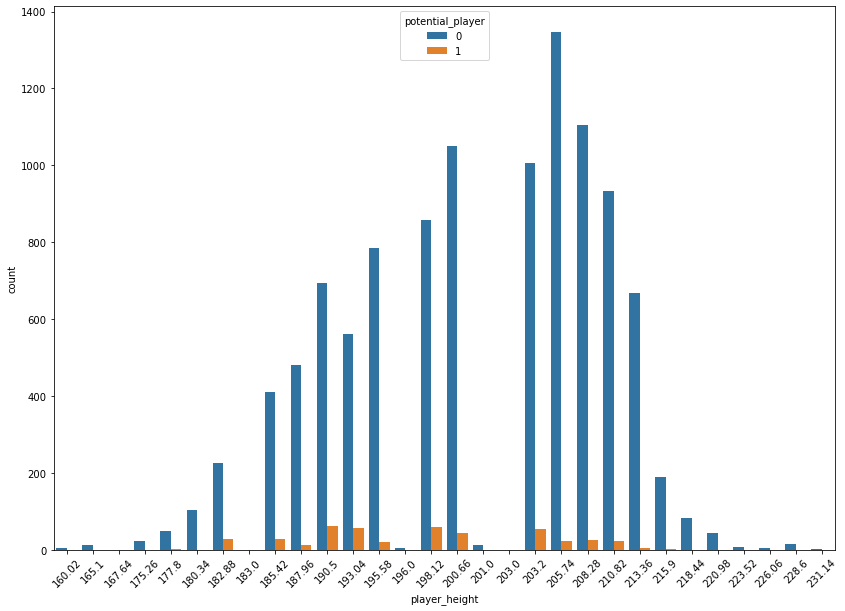

In [118]:
plt.figure(figsize=(14,10))
sns.countplot(x='player_height', hue='potential_player', data=nba)
plt.xticks(rotation=45)

In [135]:
nba['player_height'].value_counts().sort_values(ascending=True)

167.64       1
183.00       1
203.00       1
231.14       3
160.02       5
196.00       5
226.06       6
223.52       7
201.00      13
165.10      13
228.60      16
175.26      24
220.98      43
177.80      52
218.44      82
180.34     104
215.90     193
182.88     254
185.42     440
187.96     496
193.04     619
213.36     673
190.50     755
195.58     807
198.12     918
210.82     958
203.20    1061
200.66    1093
208.28    1133
205.74    1369
Name: player_height, dtype: int64

pemain terbanyak dengan tinggi ***205.74*** cm sebanyak ***1369*** orang, sedangkan pemain yang paling sedikit yaitu pemain dengan tinggi ***167,64, 183.00, 203.00*** dengan jumlah masing masing ***1*** orang

In [141]:
nba['country'].value_counts().sort_values(ascending=True)

Sudan (UK)                1
Sudan                     1
Angola                    1
Trinidad and Tobago       1
Ghana                     1
                       ... 
Brazil                   78
Spain                    79
Canada                  140
France                  153
USA                    9410
Name: country, Length: 76, dtype: int64

Negara dengan pemain basket paling sedikit yaitu berasal dari ***Sudan(UK), Sudan, Angola, Trinidad and tobago, Ghana, Guinea*** dengan jumlah per negara masing masing ***1*** orang. dan negara yang paling banyak pemain basketnya yaitu dari ***Amerika*** dan di urutan kedua yaitu ***France***

In [144]:
hts = nba_clean['pts ast'.split()]
hts.corr()
# hubungan antara banyak point yang di cetak dengan banyaknya assist terbilang sudah cukup baik
# dan ada kecendrungan antara semakin besarnya point yang di buat oleh pemain maka semakin banyak juga assist yang dilakukan

,pts,ast
pts,1.000000,0.652098
ast,0.652098,1.000000


## Train and Test

In [146]:
X_train, X_test, y_train, y_test = train_test_split(nba_scaled, poten, test_size=0.2, random_state=42)

In [147]:
X_train

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
10622,-0.959649,1.641595,-0.428090,-2.034669,-1.032226,-1.426707,-1.006482,-5.312407,-1.266744,-2.243532,2.778829,4.974998,-1.379576
6618,-1.420058,0.259743,-0.428090,0.358785,-0.055008,0.056092,-0.391909,0.169044,-0.514806,0.320108,-0.199814,0.342865,-0.516535
10200,-1.189853,1.641595,0.653975,0.279004,0.130326,1.017907,-0.391909,0.325422,1.194144,1.174655,0.252638,0.969923,-0.400762
9226,-0.729445,-0.569369,-0.247746,0.917258,0.349358,-0.304589,1.340070,0.399496,-0.628736,-0.708513,0.007559,0.474345,1.135872
4509,-1.650262,-1.398480,-1.510155,0.797585,-0.627860,-0.745421,0.055053,0.317192,-0.697094,-0.566089,-0.426041,0.069792,0.767501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.499241,-0.292998,-1.185536,-0.080014,-1.032226,-1.106102,-0.894742,-0.201324,-0.195802,-0.471139,-0.105554,0.878898,-0.727033
5191,-0.038832,-1.122110,-1.149467,0.917258,0.568389,-0.104211,2.345735,-0.036716,-0.970526,-0.550264,0.064116,-0.071801,1.809464
5390,-1.420058,-0.292998,-0.067402,-0.917723,-0.863741,-1.025951,-0.783001,-0.728070,-0.241374,-0.265415,-0.067849,1.394703,-0.253413
860,-0.038832,0.812484,0.834319,-0.957614,-1.015378,-0.424816,-0.838872,-0.604614,1.057428,0.953106,-0.633415,-0.961818,-0.748083


In [149]:
X_test

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
6118,2.263210,0.536113,0.293287,0.717804,-0.863741,0.256470,-0.615390,-0.250707,0.647280,1.506979,-1.349797,-0.193167,-0.653359
483,1.342393,-4.438556,-2.916840,0.358785,-0.408829,-0.545043,2.010513,-0.514080,-0.811024,-1.072487,-1.067015,-0.162826,2.240985
10434,-0.038832,-0.845739,-0.428090,-0.638487,1.798336,0.817529,1.898773,0.638177,-0.856596,0.193509,1.741960,0.110248,1.251645
6983,-1.420058,-0.569369,-0.067402,-0.399142,-0.947984,-0.905724,-0.391909,-0.168402,-0.583164,-0.423664,-0.275223,-1.093298,0.451754
5632,-0.959649,1.641595,1.736040,-1.037396,-0.813195,-0.064135,-0.838872,-0.464697,0.305490,1.253780,-1.387502,0.433890,-0.990155
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7051,2.263210,-0.292998,-0.428090,-0.040124,-0.156100,-0.344665,0.334405,-0.645766,-1.061670,-0.328714,-0.859641,0.150703,0.136008
2894,1.112189,0.812484,0.581837,1.116713,-0.274040,1.138134,0.613756,0.539413,0.738424,0.335933,-1.180128,-0.203281,0.178107
3204,0.421576,2.194336,1.375352,1.156604,1.208636,1.819419,-0.280169,-0.127250,1.513148,0.335933,0.818203,0.332752,-0.600734
4687,-0.959649,-0.016628,-0.428090,0.598131,0.147175,-0.464892,-0.112558,0.704021,-0.856596,-0.597738,0.082968,0.464231,-0.221839


## Modelling Machine Learning

### Decision Tree

1. pilih atribut terbaik untuk membagi record, 
2. buat atribut menjadi simpul dan keputusan lalu pecahan dataset menjadi subset kecil
3. memulai membangun pohon dan mengulangi proses ini secara rekursif untuk tiap anak
4. semua tupel memiliki nilai atribut yang sama
5. tidak ada atribut yang tersisa
6. tidak ada lagi contoh

In [151]:
dtc = DecisionTreeClassifier()

In [152]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [153]:
dtc_pred = dtc.predict(X_test)
dtc_proba = dtc.predict_proba(X_test)

In [154]:
dtc_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [157]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2149
           1       0.97      0.96      0.97        80

    accuracy                           1.00      2229
   macro avg       0.99      0.98      0.98      2229
weighted avg       1.00      1.00      1.00      2229



In [158]:
tndtc, fpdtc, fndtc, tpdtc = confusion_matrix(y_test, dtc_pred).ravel()
print(confusion_matrix(y_test, dtc_pred))

[[2147    2]
 [   3   77]]


### Gradient Boost

1. model aditif dengan cara yang bijaksana tahap ke depan; ini memungkinkan pengoptimalan fungsi kerugian yang dapat dibedakan secara arbitrer. 
2. Dalam setiap tahap, pohon regresi n_classes_ ditempatkan pada gradien negatif dari fungsi kerugian penyimpangan binomial atau multinomial.  
3. Klasifikasi biner adalah kasus khusus di mana hanya satu pohon regresi yang diinduksi.

In [159]:
gbc = GradientBoostingClassifier()

In [160]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [161]:
gbc_pred = gbc.predict(X_test)
gbc_proba = gbc.predict_proba(X_test)

In [162]:
gbc_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [163]:
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2149
           1       1.00      1.00      1.00        80

    accuracy                           1.00      2229
   macro avg       1.00      1.00      1.00      2229
weighted avg       1.00      1.00      1.00      2229



In [164]:
tngbc, fpgbc, fngbc, tpgbc = confusion_matrix(y_test, gbc_pred).ravel()
print(confusion_matrix(y_test, gbc_pred))

[[2149    0]
 [   0   80]]


### Random Forest


1. Secara acak pilih fitur "K" dari total fitur "m" di mana k << m
2. Di antara fitur "K", hitung node "d" menggunakan titik pisah terbaik
3. Pisahkan node menjadi node anak menggunakan pemisahan terbaik
4. Ulangi langkah a sampai c sampai jumlah node “l” tercapai
5. Bangun hutan dengan mengulangi langkah a sampai d untuk jumlah “n” kali untuk membuat jumlah pohon “n”

In [165]:
rfc = RandomForestClassifier()

In [166]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [167]:
rfc_pred = rfc.predict(X_test)
rfc_proba = rfc.predict_proba(X_test)

In [168]:
rfc_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [169]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2149
           1       0.99      0.99      0.99        80

    accuracy                           1.00      2229
   macro avg       0.99      0.99      0.99      2229
weighted avg       1.00      1.00      1.00      2229



In [170]:
tnrfc, fprfc, fnrfc, tprfc = confusion_matrix(y_test, rfc_pred).ravel()
print(confusion_matrix(y_test, rfc_pred))

[[2148    1]
 [   1   79]]


## Evaluation

### Gradient Boost Evaluation

In [189]:
probgbc = gbc_proba[:,1]
fpr_gbc, tpr_gbc, threshold_gbc = roc_curve(y_test, probgbc)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

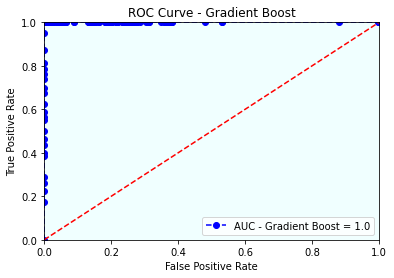

In [191]:
plt.title('ROC Curve - Gradient Boost')
plt.plot(fpr_gbc, tpr_gbc, 'b--o', label='AUC - Gradient Boost = {}'.format(roc_auc_gbc))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gbc, tpr_gbc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

### Random Forest Evaluation

In [192]:
probrfc = rfc_proba[:,1]
fpr_rfc, tpr_rfc, threshold_rfc = roc_curve(y_test, probrfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

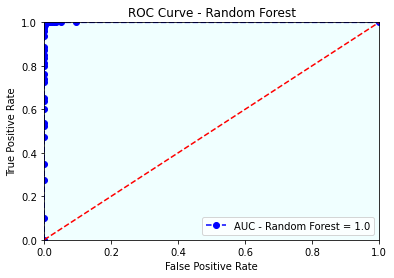

In [200]:
plt.title('ROC Curve - Random Forest')
plt.plot(fpr_rfc, tpr_rfc, 'b--o', label='AUC - Random Forest = {}'.format(round(roc_auc_rfc,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc, tpr_rfc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

### Decision Tree Evaluation

In [195]:
probdtc = dtc_proba[:,1]
fpr_dtc, tpr_dtc, threshold_dtc = roc_curve(y_test, probdtc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

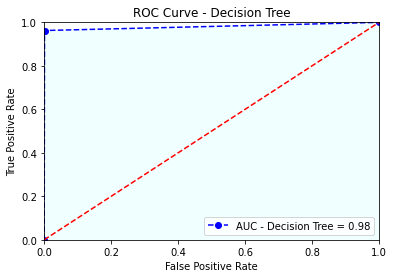

In [201]:
plt.title('ROC Curve - Decision Tree')
plt.plot(fpr_dtc, tpr_dtc, 'b--o', label='AUC - Decision Tree = {}'.format(round(roc_auc_dtc,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dtc, tpr_dtc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

### Model Comparation

In [240]:
model_com = pd.DataFrame({
    "Decision Tree": [accuracy_score(y_test, dtc_pred),precision_score(y_test, dtc_pred, pos_label=0),recall_score(y_test, dtc_pred),f1_score(y_test, dtc_pred), tpdtc, tndtc, fpdtc, fndtc],
    "Gradient Boost": [accuracy_score(y_test, gbc_pred),precision_score(y_test, gbc_pred, pos_label=0),recall_score(y_test, gbc_pred),f1_score(y_test, gbc_pred), tpgbc, tngbc, fpgbc, fngbc],
    "Random Forest": [accuracy_score(y_test, rfc_pred),precision_score(y_test, rfc_pred, pos_label=0),recall_score(y_test, rfc_pred),f1_score(y_test, rfc_pred), tprfc, tnrfc, fprfc, fnrfc],
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'True Positive', 'True Negative', 'False Positive', 'False Negative'])
model_com

,Decision Tree,Gradient Boost,Random Forest
Accuracy Score,0.997757,1.0,0.999103
Precision Score,0.998605,1.0,0.999535
Recall Score,0.962500,1.0,0.987500
F1 Score,0.968553,1.0,0.987500
True Positive,77.000000,80.0,79.000000
True Negative,2147.000000,2149.0,2148.000000
False Positive,2.000000,0.0,1.000000
False Negative,3.000000,0.0,1.000000


Dari ketiga machine learning ini yang terbaik adalah Gradient Boost dari semua aspek yaitu `Precision dan Recall` memiliki niali ***1*** . yang mana nilai itu lebih baik di banding nilai `Accuracy`. Dikarenakan data yang memiliki potensi dan tidak memiliki potensi tidak imbang

### Comparation By ROC AUC

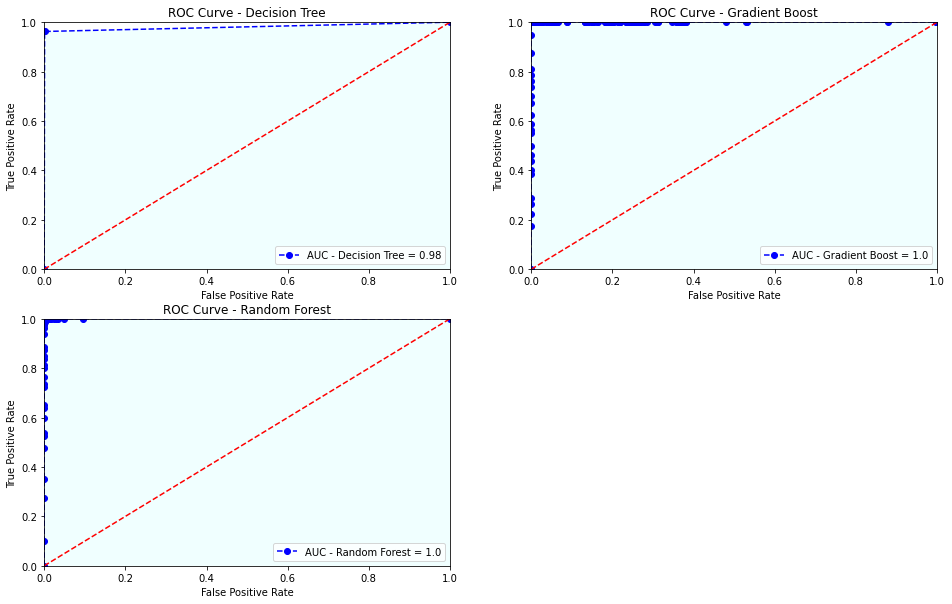

In [205]:
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.title('ROC Curve - Decision Tree')
plt.plot(fpr_dtc, tpr_dtc, 'b--o', label='AUC - Decision Tree = {}'.format(round(roc_auc_dtc,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dtc, tpr_dtc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

plt.subplot(222)
plt.title('ROC Curve - Gradient Boost')
plt.plot(fpr_gbc, tpr_gbc, 'b--o', label='AUC - Gradient Boost = {}'.format(roc_auc_gbc))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gbc, tpr_gbc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

plt.subplot(223)
plt.title('ROC Curve - Random Forest')
plt.plot(fpr_rfc, tpr_rfc, 'b--o', label='AUC - Random Forest = {}'.format(round(roc_auc_rfc,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc, tpr_rfc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()
plt.show()

Dari ROC AUC di atas `Gradient Boost` dan `Random Forest` memiliki nilai ***auc*** yang sama besarnya. namun bila di telaah lebih baik menggunakan `Gradient Boost` di karenakan `precision dan recall` memiliki nilai lebih tinggi

Fokus dari evaluasi saya sebanarnya `mengurangi False Positive`. di karenakan apabila pemain memang `tidak berpotensi` jangan sampai dia dibilang `berpotensi` karena nantinya pada seleksi selanjutnya pun ia akan kesulitan. begitu juga apabila dia `berpotensi` namun diprediksi tidak berpotensi masih ada lain waktu untuk dia mendaftar.

Namun machine learning saya bisa memprediksi dengan baik yang mana test dan train berjalan sangat baik. dan memiliki `precision dan recall` yang sempurna, padahal data nya tidak imbang.

### SMOTE

In [208]:
smote = SMOTE(random_state=42)
X_smo, y_smo = smote.fit_resample(X_train, y_train)

1    0.5
0    0.5
Name: potential_player, dtype: float64

In [211]:
gbc_smo = GradientBoostingClassifier()

In [212]:
gbc_smo.fit(X_smo, y_smo)
gbc_smo_pred = gbc_smo.predict(X_test)
gbc_smo_pred_proba = gbc_smo.predict_proba(X_test)

In [213]:
# with smote
tngbc_smo, fpgbc_smo, fngbc_smo, tpgbc_smo = confusion_matrix(y_test, gbc_smo_pred).ravel()
print(confusion_matrix(y_test, gbc_smo_pred))

[[2148    1]
 [   0   80]]


In [214]:
tngbc, fpgbc, fngbc, tpgbc = confusion_matrix(y_test, gbc_pred).ravel()
print(confusion_matrix(y_test, gbc_pred))

[[2149    0]
 [   0   80]]


In [215]:
# with SMOTE
print(classification_report(y_test, gbc_smo_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2149
           1       0.99      1.00      0.99        80

    accuracy                           1.00      2229
   macro avg       0.99      1.00      1.00      2229
weighted avg       1.00      1.00      1.00      2229



In [216]:
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2149
           1       1.00      1.00      1.00        80

    accuracy                           1.00      2229
   macro avg       1.00      1.00      1.00      2229
weighted avg       1.00      1.00      1.00      2229



### Comparison Acc, Pre, Rec, f1, TP, TN, FP, FN Gradient Boost without and With Smote

In [239]:
model_com = pd.DataFrame({
    "Gradient Boost": [accuracy_score(y_test, gbc_pred),precision_score(y_test, gbc_pred, pos_label=0),recall_score(y_test, gbc_pred),f1_score(y_test, gbc_pred), tpgbc, tngbc, fpgbc, fngbc],
    "Gradient Boost SMOTE": [accuracy_score(y_test, gbc_smo_pred),precision_score(y_test, gbc_smo_pred, pos_label=0),recall_score(y_test, gbc_smo_pred),f1_score(y_test, gbc_smo_pred), tpgbc_smo, tngbc_smo, fpgbc_smo, fngbc_smo],
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'True Positive', 'True Negative', 'False Positive', 'False Negative'])
model_com

,Gradient Boost,Gradient Boost SMOTE
Accuracy Score,1.0,0.999551
Precision Score,1.0,1.000000
Recall Score,1.0,1.000000
F1 Score,1.0,0.993789
True Positive,80.0,80.000000
True Negative,2149.0,2148.000000
False Positive,0.0,1.000000
False Negative,0.0,0.000000


### Comparison ROC AUC Gradient Boost Without and With Smote

In [223]:
gbcsmo1 = gbc_smo_pred_proba[:, 1]
fpr_gbc_smo, tpr_gbc_smo, threshold_gbc = roc_curve(y_test, gbcsmo1)
roc_auc_gbc_smo = auc(fpr_gbc_smo, tpr_gbc_smo)

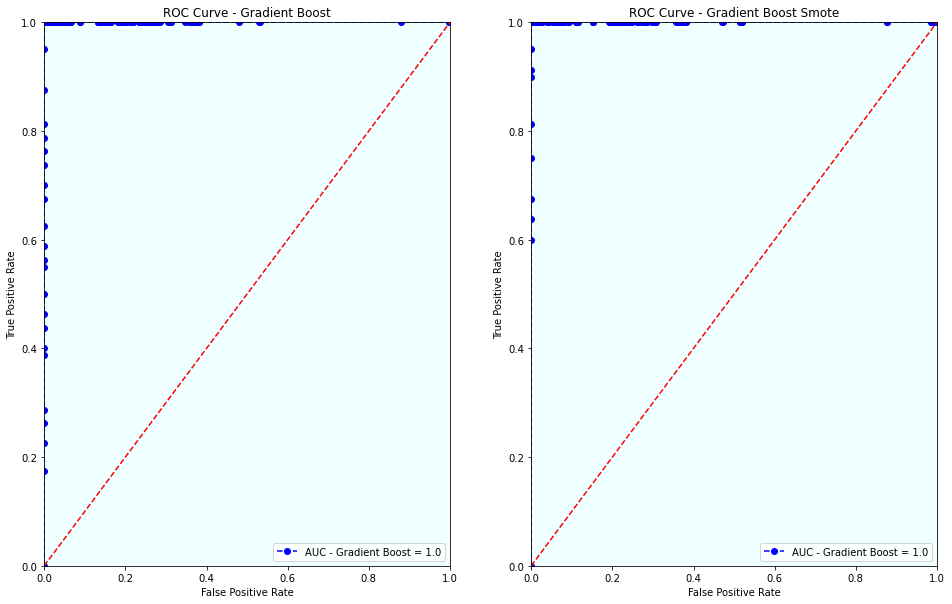

In [227]:
plt.figure(figsize=(16,10))
plt.subplot(121)
plt.title('ROC Curve - Gradient Boost')
plt.plot(fpr_gbc, tpr_gbc, 'b--o', label='AUC - Gradient Boost = {}'.format(roc_auc_gbc))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gbc, tpr_gbc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

plt.subplot(122)
plt.title('ROC Curve - Gradient Boost Smote')
plt.plot(fpr_gbc_smo, tpr_gbc_smo, 'b--o', label='AUC - Gradient Boost = {}'.format(roc_auc_gbc_smo))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gbc_smo, tpr_gbc_smo, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

Dari hasil di atas `Gradient Boost` tanpa di smote lebih baik dari `Gradient Boost with Smote` dilihat dari hasil `True Negativenya` dan `F1 score` nya

### Hyperparameter

In [230]:
gbc_hyper = GradientBoostingClassifier(random_state=42)

In [232]:
gbc_hyper.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [233]:
param_random_gbc = {
    'learning_rate': [0.1,0.5],
    'max_depth' : [3, 10],
    'min_samples_split' : [2,5],
    'n_estimators' : [100,200],
}
random_search_gbc = RandomizedSearchCV(estimator=gbc_hyper, param_distributions=param_random_gbc, scoring='roc_auc', n_jobs=-1)
random_search_gbc.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.5],
                                        'max_depth': [3, 10],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   scoring='roc_auc')

In [234]:
random_search_gbc.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'max_depth': 3,
 'learning_rate': 0.1}

In [235]:
gbc_random = random_search_gbc.best_estimator_

In [236]:
gbc_random_pred = gbc_random.predict(X_test)
gbc_random_proba = gbc_random.predict_proba(X_test)

In [237]:
print(classification_report(y_test, gbc_random_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2149
           1       1.00      1.00      1.00        80

    accuracy                           1.00      2229
   macro avg       1.00      1.00      1.00      2229
weighted avg       1.00      1.00      1.00      2229



In [238]:
tngbc_hyper, fpgbc_hyper, fngbc_hyper, tpgbc_hyper = confusion_matrix(y_test, gbc_random_pred).ravel()
print(confusion_matrix(y_test, gbc_random_pred))

[[2149    0]
 [   0   80]]


### Comparison Gradient Boost Without and With Hyperparameter

In [243]:
model_com = pd.DataFrame({
    "Gradient Boost": [accuracy_score(y_test, gbc_pred),precision_score(y_test, gbc_pred, pos_label=0),recall_score(y_test, gbc_pred),f1_score(y_test, gbc_pred), tpgbc, tngbc, fpgbc, fngbc],
    "Gradient Boost Hyper": [accuracy_score(y_test, gbc_random_pred),precision_score(y_test, gbc_random_pred, pos_label=0),recall_score(y_test, gbc_random_pred),f1_score(y_test, gbc_random_pred), tpgbc_hyper, tngbc_hyper, fpgbc_hyper,fngbc_hyper],
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'True Positive', 'True Negative', 'False Positive', 'False Negative'])
model_com

,Gradient Boost,Gradient Boost Hyper
Accuracy Score,1.0,1.0
Precision Score,1.0,1.0
Recall Score,1.0,1.0
F1 Score,1.0,1.0
True Positive,80.0,80.0
True Negative,2149.0,2149.0
False Positive,0.0,0.0
False Negative,0.0,0.0


### Comparison ROC AUC Gradient Boost Without and With Hyperparameter

In [246]:
gbchyp1 = gbc_random_proba[:, 1]
fpr_gbc_hyp, tpr_gbc_hyp, threshold_gbc_hyp = roc_curve(y_test, gbchyp1)
roc_auc_gbc_hyp = auc(fpr_gbc_hyp, tpr_gbc_hyp)

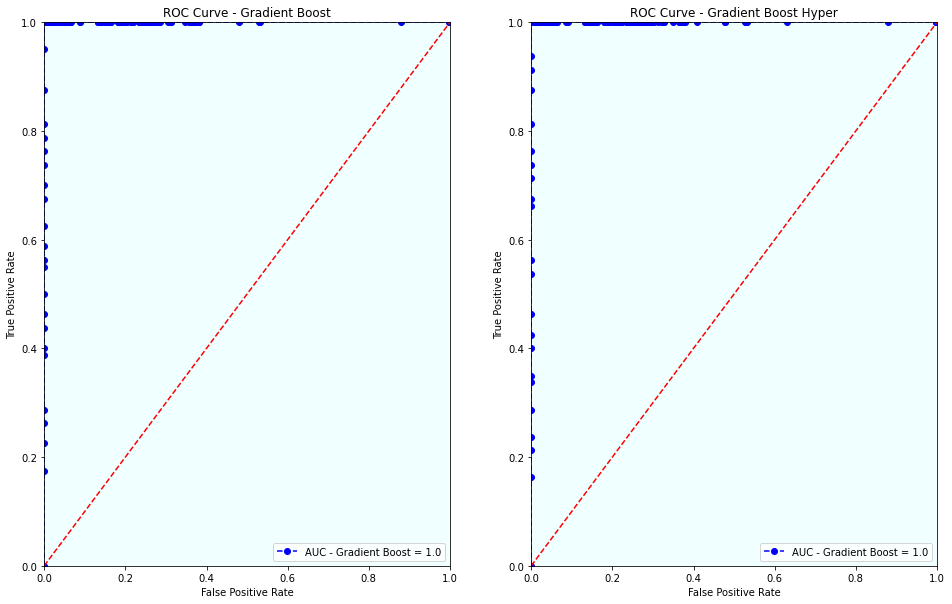

In [247]:
plt.figure(figsize=(16,10))
plt.subplot(121)
plt.title('ROC Curve - Gradient Boost')
plt.plot(fpr_gbc, tpr_gbc, 'b--o', label='AUC - Gradient Boost = {}'.format(roc_auc_gbc))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gbc, tpr_gbc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

plt.subplot(122)
plt.title('ROC Curve - Gradient Boost Hyper')
plt.plot(fpr_gbc_hyp, tpr_gbc_hyp, 'b--o', label='AUC - Gradient Boost = {}'.format(roc_auc_gbc_hyp))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gbc_hyp, tpr_gbc_hyp, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

Dari hasil di atas `Gradient Boost` yang di `Hyperparameter` maupun tidak. hasilnya sama saja. namun lebih baik tidak menggunakan hyperparameter. di karenakan lebih cepat prosesnya di bandingkan dengan `Hyperparameter` yang harus menunggu `RandomizedSearchCV`

### Threshold Gradient Boost

In [256]:
thres_gbc = pd.DataFrame({'thres': threshold_gbc, 'tpr': tpr_gbc, 'fpr': fpr_gbc})
thres_gbc.sort_values('tpr',ascending=False)

,thres,tpr,fpr
71,0.000014,1.0000,0.181945
98,0.000004,1.0000,0.248488
92,0.000006,1.0000,0.239646
93,0.000005,1.0000,0.242438
94,0.000005,1.0000,0.243369
...,...,...,...
4,0.999705,0.2875,0.000000
3,0.999706,0.2625,0.000000
2,0.999725,0.2250,0.000000
1,0.999739,0.1750,0.000000


In [257]:
gbc_pred_14 = [0 if x < 0.000014 else 1 for x in probgbc]
gbc_pred_14

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,


In [258]:
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2149
           1       1.00      1.00      1.00        80

    accuracy                           1.00      2229
   macro avg       1.00      1.00      1.00      2229
weighted avg       1.00      1.00      1.00      2229



In [259]:
print(classification_report(y_test, gbc_pred_14))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      2149
           1       0.19      1.00      0.31        80

    accuracy                           0.84      2229
   macro avg       0.59      0.92      0.61      2229
weighted avg       0.97      0.84      0.89      2229



Lebih baik dengan threshold 0.5, karena apabila di turunkan ke ***0.000014*** maka hasilnya lebih jelek dibandingkan dengan threshold nomal atau ***0.5***

In [260]:
new = pd.read_csv('new_players.csv')
new

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,28.0,200.66,103.418976,Nevada-Las Vegas,USA,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068
496,496,497,28.0,200.66,107.047712,California,USA,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099
497,497,498,23.0,208.28,103.418976,Wisconsin,USA,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072
498,498,499,24.0,213.36,108.862080,DePaul,USA,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021


In [268]:
nba_clean.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113
1,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048
2,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148
3,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077
4,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040


In [264]:
prediksi = new
prediksi = prediksi.drop(['Unnamed: 0', 'player_id','college', 'country'],axis=1)

In [266]:
prediksi.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,37.0,205.74,104.326160,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,33.0,160.02,63.956472,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,27.0,193.04,95.254320,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250
3,21.0,195.58,99.790240,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174
4,23.0,215.90,122.469840,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037


In [274]:
scaler.fit(prediksi)
scaler_feature_predict = scaler.transform(prediksi)
predict_data = pd.DataFrame(scaler_feature_predict, columns=nba_clean.columns)
predict_data

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,2.342023,0.499014,0.250921,0.664993,-0.895364,0.247934,-0.617326,-0.186725,0.684281,1.609449,-1.425465,-0.172796,-0.614537
1,1.391912,-4.394712,-2.945117,0.307769,-0.446118,-0.589963,2.243481,-0.458498,-0.821288,-1.175420,-1.137166,-0.143601,2.374878
2,-0.033254,-0.860354,-0.467290,-0.684522,1.733558,0.834461,2.121745,0.730509,-0.868337,0.191387,1.726603,0.119155,1.353041
3,-1.458420,-0.588480,-0.108185,-0.446372,-0.978558,-0.967016,-0.373853,-0.101796,-0.586043,-0.474931,-0.329929,-1.038917,0.526876
4,-0.983365,1.586509,1.687342,-1.081438,-0.845448,-0.087225,-0.860798,-0.407541,0.331414,1.336088,-1.463905,0.430569,-0.962396
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.204274,-0.044733,0.179099,1.101601,2.232720,3.431940,0.052225,0.857903,0.731330,1.626534,0.650287,0.819837,-0.625407
496,0.204274,-0.044733,0.466384,0.982526,0.735233,0.331723,-0.069512,-0.161246,-0.021454,-0.321165,0.861706,-0.163064,-0.288419
497,-0.983365,0.770888,0.179099,-0.287605,-0.612505,-0.422384,-0.739062,0.271892,0.754855,0.328068,-0.272270,0.284594,-0.581925
498,-0.745837,1.314636,0.610026,0.625302,-0.379563,0.122249,-0.921667,0.110527,1.037149,-0.047804,-0.810428,0.887959,-1.136325


In [275]:
prediksi_orang = gbc.predict(prediksi)

In [300]:
new['Potential_player'] = prediksi_orang

In [301]:
(new['Potential_player'] == 0).value_counts()

True    500
Name: Potential_player, dtype: int64

In [302]:
new['Terima/Tidak'] = new.apply(lambda x: 'Tidak' if (x['Potential_player'] == 0) else'Terima', axis=1)

In [303]:
new

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Potential_player,Terima/Tidak
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069,0,Tidak
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344,0,Tidak
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250,0,Tidak
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174,0,Tidak
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037,0,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,28.0,200.66,103.418976,Nevada-Las Vegas,USA,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068,0,Tidak
496,496,497,28.0,200.66,107.047712,California,USA,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099,0,Tidak
497,497,498,23.0,208.28,103.418976,Wisconsin,USA,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072,0,Tidak
498,498,499,24.0,213.36,108.862080,DePaul,USA,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021,0,Tidak


Dari hasil di atas setelah di olah dengan `Machine Learning` dengan menggunakan metode ***Gradient Boost*** tanpa `hyperparameter` dan tanpa `oversampling` hasilnya sudah cukup memuaskan.
Namun dari hasil yang memuaskan ternyata hasil prediksinya mengatakan bahwa  tidak satupun `new_players` belum lah memasuki kualifikasi dari data `nba_players`